In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

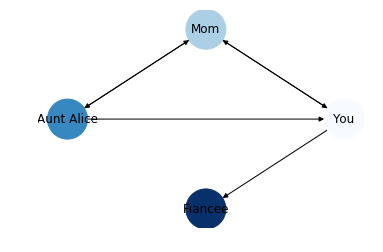

In [2]:
import networkx as nx

#Creating a directed graph
G = nx.DiGraph()
#Adding nodes.  We could have added them all in one list using .add_nodes_from()
G.add_node('You')
G.add_node('Mom')
G.add_node('Aunt Alice')
G.add_node('Fiancee')

#Adding edges.  You can also add them individually using .add_edge() 
G.add_edges_from([('You','Mom'),('You','Fiancee')])
G.add_edges_from([('Mom','You'),('Mom','Aunt Alice')])
G.add_edges_from([('Aunt Alice','Mom'),('Aunt Alice','You')])

#Drawing the graph
nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()


In [3]:
print("This graph has {} nodes and {} edges.".format(G.number_of_nodes(),G.number_of_edges()))

print('The "Aunt Alice" node has an in-degree of {} and an out-degree of {}.'.format(G.in_degree('Aunt Alice'),G.out_degree('Aunt Alice')))

print("The nodes are {}.".format(G.nodes()))

print("The edges are {}.".format(G.edges()))

print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(G)))

print('The node degrees are {}.'.format(G.degree()))


This graph has 4 nodes and 6 edges.
The "Aunt Alice" node has an in-degree of 1 and an out-degree of 2.
The nodes are ['You', 'Mom', 'Aunt Alice', 'Fiancee'].
The edges are [('You', 'Mom'), ('You', 'Fiancee'), ('Mom', 'You'), ('Mom', 'Aunt Alice'), ('Aunt Alice', 'Mom'), ('Aunt Alice', 'You')].
The betweenness centrality scores are {'You': 0.3333333333333333, 'Mom': 0.16666666666666666, 'Aunt Alice': 0.0, 'Fiancee': 0.0}
The node degrees are [('You', 4), ('Mom', 4), ('Aunt Alice', 3), ('Fiancee', 1)].


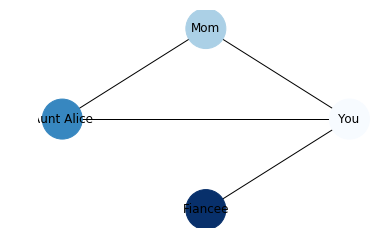

This graph has 4 nodes and 4 edges.
The "Aunt Alice" node has a degree of 2.
The nodes are ['You', 'Mom', 'Aunt Alice', 'Fiancee'].
The edges are [('You', 'Mom'), ('You', 'Fiancee'), ('You', 'Aunt Alice'), ('Mom', 'Aunt Alice')].
The clustering coefficients are: {'You': 0.3333333333333333, 'Mom': 1.0, 'Aunt Alice': 1.0, 'Fiancee': 0}
The betweenness centrality scores are {'You': 0.6666666666666666, 'Mom': 0.0, 'Aunt Alice': 0.0, 'Fiancee': 0.0}
The degree centrality scores are [('You', 3), ('Mom', 2), ('Aunt Alice', 2), ('Fiancee', 1)]


In [4]:
UG=G.to_undirected()

#Drawing the new graph
nx.draw_networkx(UG,
                 pos=nx.circular_layout(UG), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

print("This graph has {} nodes and {} edges.".format(UG.number_of_nodes(),UG.number_of_edges()))

print('The "Aunt Alice" node has a degree of {}.'.format(UG.degree('Aunt Alice')))

print("The nodes are {}.".format(UG.nodes()))

print("The edges are {}.".format(UG.edges()))

#Note that networkx does not have defined clustering algorithms for directed graphs.
print("The clustering coefficients are: {}".format(nx.clustering(UG)))
print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(UG)))
print("The degree centrality scores are {}".format(nx.degree(UG)))

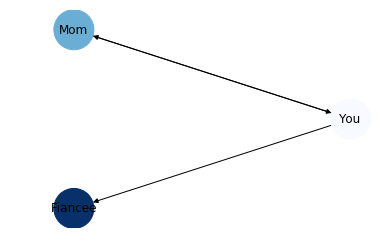

[('You', 'Mom'), ('You', 'Fiancee'), ('Mom', 'You')]


In [5]:
small_G=G.copy()
small_G.remove_node('Aunt Alice')
nx.draw_networkx(small_G,pos=nx.circular_layout(small_G),node_size=1600, cmap=plt.cm.Blues,
        node_color=range(len(small_G)))
plt.axis('off')
plt.show()

print(small_G.edges())

The clustering coefficients are: {'You': 0.03333333333333334, 'Mom': 0.10000000000000002, 'Aunt Alice': 0.10000000000000002, 'Fiancee': 0}
The betweenness centrality scores are {'You': 1.0, 'Mom': 0.0, 'Aunt Alice': 0.0, 'Fiancee': 0.0}
The degree centrality scores are [('You', 8.1), ('Mom', 11), ('Aunt Alice', 10.1), ('Fiancee', 7)]


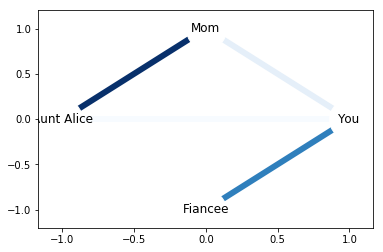

In [6]:
weighted_UG=UG.copy()

#Adding weights reflecting that Aunt Alice and Mom talk more than once a day
weighted_UG['Aunt Alice']['Mom']['weight'] = 10
#Adding a weight reflecting that You and Mom text once a week
weighted_UG['You']['Mom']['weight'] = 1
#Adding a weight reflecting that Aunt Alice almost never talks to You
weighted_UG['Aunt Alice']['You']['weight'] = .1
#Adding a weight reflecting that You talk to your fiancee every day
weighted_UG['You']['Fiancee']['weight'] = 7

#Extracting edges and weights into two lists
edges,weights=zip(*nx.get_edge_attributes(weighted_UG,'weight').items())
nx.draw_networkx(weighted_UG,
                 pos=nx.circular_layout(weighted_UG),
                 node_size=1600,
                 node_color="white", 
                 edgelist=edges, #Ordering the edges so that the weights list works
                 edge_color=weights, #Weights
                 width=6.0, 
                 edge_cmap=plt.cm.Blues) #Darker colors indicate higher weights

#Note that to incorporate weights into most calculations in networkx, you need to specify the name of the weight attribute.
print("The clustering coefficients are: {}".format(nx.clustering(weighted_UG, weight='weight')))
print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(weighted_UG, weight='weight')))
print("The degree centrality scores are {}".format(nx.degree(weighted_UG, weight='weight')))

Undirected Extended Graph

Take the current undirected graph describing the Aunt Alice scenario and update it to reflect the following events:

As a result of Aunt Alice’s temper tantrum, she and your mother are no longer speaking to each other. Aunt Alice, still angry, called your fiancee to complain-- shockingly, this has ended in the fiancee becoming good friends with Aunt Alice due to their shared love of cute cat photos. Meanwhile, you’ve met two of your fiancee’s best friends, Dave and Brian, who are themselves good friends of long standing.

In [ ]:
UG.remove_edge('Mom','Aunt Alice')


In [ ]:
UG.remove_node('Fiance')

In [141]:
UG.add_node('Brian')
UG.add_node('Dave')



UG.add_edge('Brian','Dave')
UG.add_edge('Brian','Fiancee')
UG.add_edge('Brian','You')
UG.add_edge('You','Dave')
UG.add_edge('Dave','Fiancee')

In [142]:
print("This graph has {} nodes and {} edges.".format(UG.number_of_nodes(),UG.number_of_edges()))

This graph has 7 nodes and 10 edges.


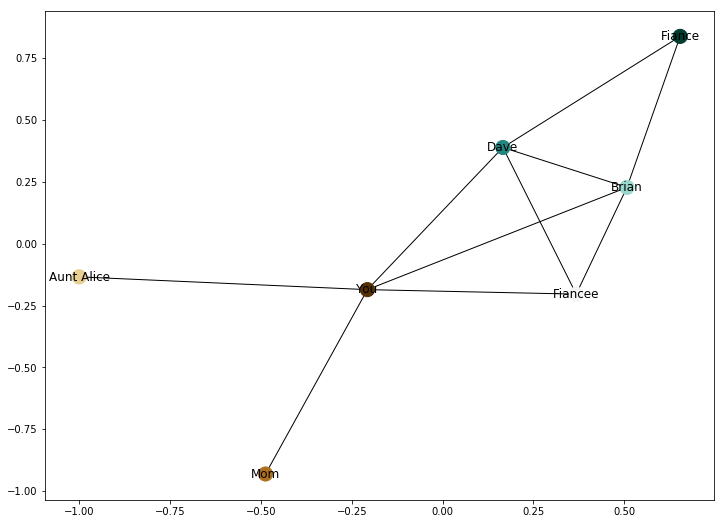

In [143]:
plt.figure(figsize=(12,9))
nx.draw_networkx(UG,
                 pos=nx.spring_layout(UG), # Positions the nodes relative to each other
                 node_size=200, 
                 cmap=plt.cm.BrBG, # The color palette to use to color the nodes.
                 node_color=range(len(UG)) #The number of shades of color to use.
                 )

Take this graph file and discover the following:

    Number of nodes:
    Number of edges:
    Is the graph directed or undirected?
    Which node has the highest degree?
    Average clustering coefficient (if possible):
    The nodes with the three highest betweenness centrality scores, and their scores:

Also experiment with various ways to draw the network.

In [58]:
Ufull = nx.read_gml('graph.gml')

In [114]:
#Number of nodes and edges:
print("This graph has {} nodes and {} edges.".format(Ufull.number_of_nodes(),Ufull.number_of_edges()))

This graph has 77 nodes and 254 edges.


In [116]:
dir(nx)
nx.is_directed(Ufull)

False

This is an undirected graph

Which node has the highest degree?

In [111]:
deg_dict = dict(nx.degree(Ufull))
nodes = list(deg_dict)
degrees = [deg_dict[i] for i in nodes]

deg_df = pd.DataFrame()
deg_df['nodes'] = nodes
deg_df['degrees'] = degrees
deg_df.sort_values(by='degrees',ascending=False).head(1)

,nodes,degrees
11,Valjean,36


Oooo its Les Mis.....

Average clustering coefficient (if possible):

In [119]:
nx.average_clustering(Ufull)

0.5731367499320134

The nodes with the three highest betweenness centrality scores, and their scores:

In [124]:
dir(nx)
bc_dict = dict(nx.betweenness_centrality(Ufull))
nodes = list(bc_dict)
bcs = [bc_dict[i] for i in nodes]

bc_df = pd.DataFrame()
bc_df['nodes'] = nodes
bc_df['bcs'] = bcs
bc_df.sort_values(by='bcs',ascending=False).head(3)

,nodes,bcs
11,Valjean,0.569989
0,Myriel,0.176842
48,Gavroche,0.165113


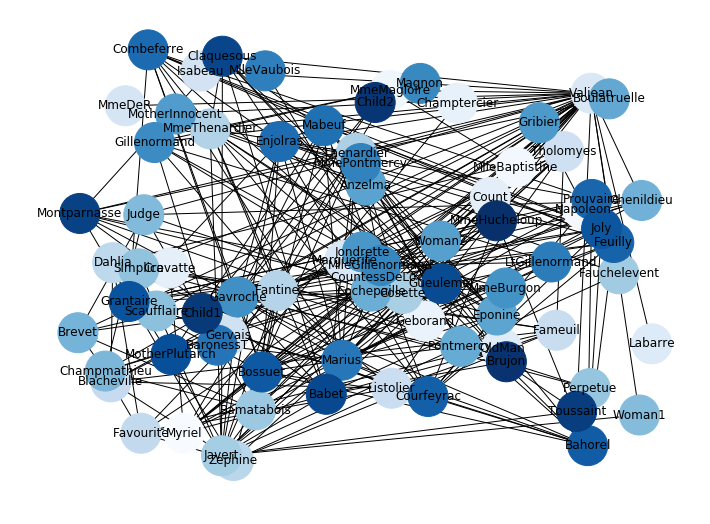

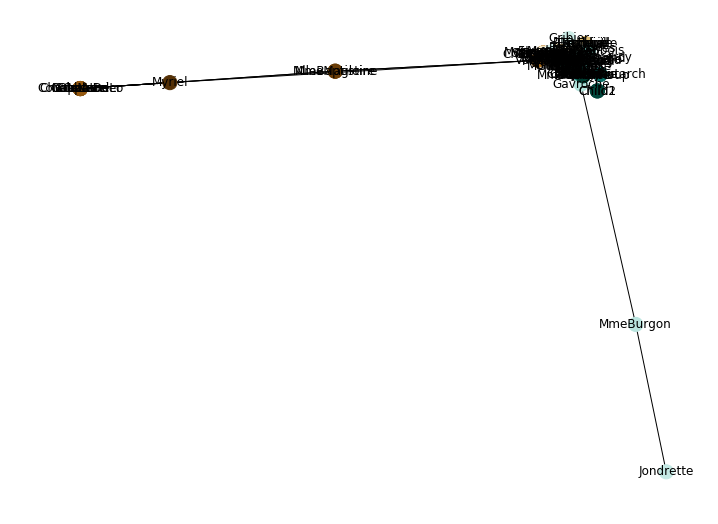

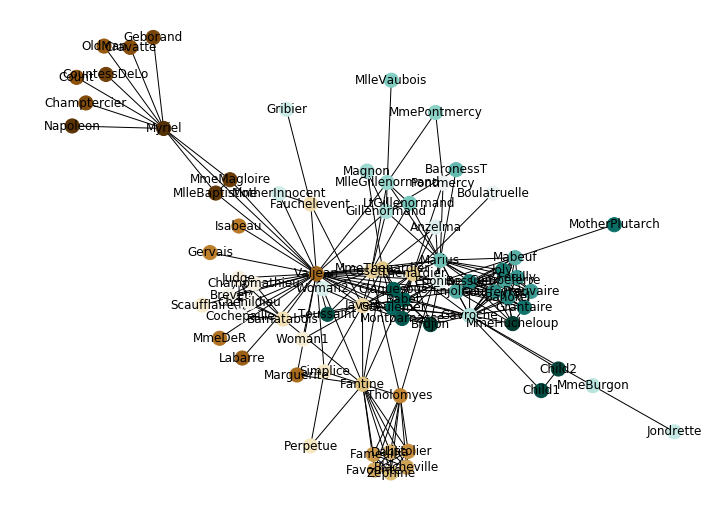

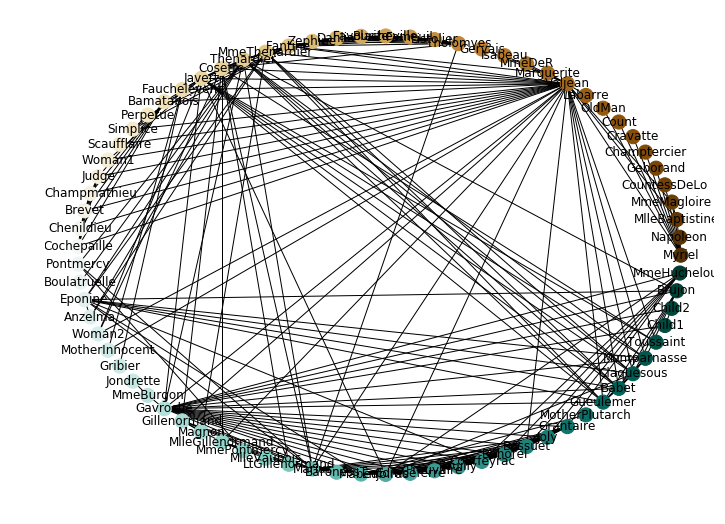

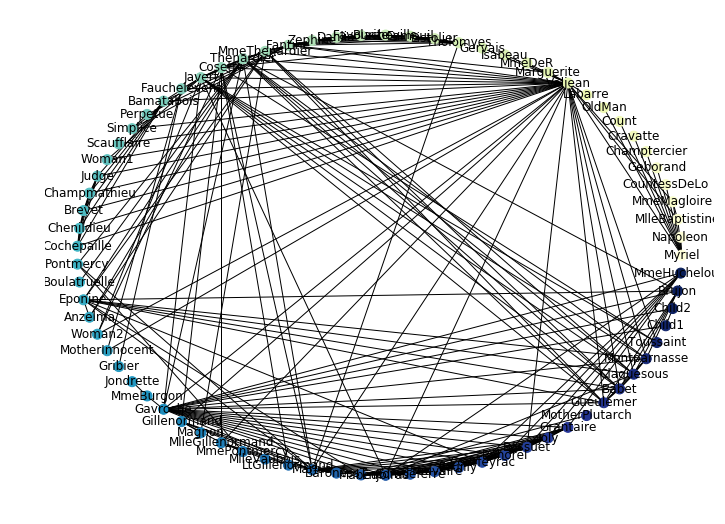

In [132]:
plt.figure(figsize=(12,9))
nx.draw_networkx(Ufull,
                 pos=nx.random_layout(Ufull), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(Ufull)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

plt.figure(figsize=(12,9))
nx.draw_networkx(Ufull,
                 pos=nx.spectral_layout(Ufull), # Positions the nodes relative to each other
                 node_size=200, 
                 cmap=plt.cm.BrBG, # The color palette to use to color the nodes.
                 node_color=range(len(Ufull)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

plt.figure(figsize=(12,9))
nx.draw_networkx(Ufull,
                 pos=nx.spring_layout(Ufull), # Positions the nodes relative to each other
                 node_size=200, 
                 cmap=plt.cm.BrBG, # The color palette to use to color the nodes.
                 node_color=range(len(Ufull)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

plt.figure(figsize=(12,9))
nx.draw_networkx(Ufull,
                 pos=nx.shell_layout(Ufull), # Positions the nodes relative to each other
                 node_size=200, 
                 cmap=plt.cm.BrBG, # The color palette to use to color the nodes.
                 node_color=range(len(Ufull)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

plt.figure(figsize=(12,9))
nx.draw_networkx(Ufull,
                 pos=nx.circular_layout(Ufull), # Positions the nodes relative to each other
                 node_size=100, 
                 cmap=plt.cm.YlGnBu, # The color palette to use to color the nodes.
                 node_color=range(len(Ufull)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()